In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/home/student/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:


df = pd.read_csv('House_Price_dataset.csv')

In [3]:
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,yes,no,yes,no,no,2.0,no,unfurnished
541,1767150,2400,3.0,1.0,1.0,no,no,no,no,no,0.0,no,semi-furnished
542,1750000,3620,2.0,1.0,1.0,yes,no,no,no,no,0.0,no,unfurnished
543,1750000,2910,3.0,1.0,1.0,no,no,no,no,no,0.0,no,furnished


In [4]:
numeric_cols = ['bedrooms', 'bathrooms', 'stories', 'parking']
for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

In [5]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [6]:
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,1,0,0,0,1,2.0,1,furnished
1,12250000,8960,4.0,4.0,4.0,1,0,0,0,1,3.0,0,furnished
2,12250000,9960,3.0,2.0,2.0,1,0,1,0,0,2.0,1,semi-furnished
3,12215000,7500,4.0,2.0,2.0,1,0,1,0,1,3.0,1,furnished
4,11410000,7420,4.0,1.0,2.0,1,1,1,0,1,2.0,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,1,0,1,0,0,2.0,0,unfurnished
541,1767150,2400,3.0,1.0,1.0,0,0,0,0,0,0.0,0,semi-furnished
542,1750000,3620,2.0,1.0,1.0,1,0,0,0,0,0.0,0,unfurnished
543,1750000,2910,3.0,1.0,1.0,0,0,0,0,0,0.0,0,furnished


In [7]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


In [8]:
X_simple = df[['area']]
y = df['price']

In [9]:
X_simple_train, X_simple_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=42)


In [10]:
simple_model = LinearRegression()
simple_model.fit(X_simple_train, y_train)

LinearRegression()

In [11]:
y_simple_pred = simple_model.predict(X_simple_test)


In [12]:
print(y_simple_pred)

[5024060.33139816 5279498.23656143 4232202.82539203 4640903.47365326
 4198144.43803692 5373158.80178796 6139472.51727777 4636646.17523387
 3891618.951841   3661724.83719406 6165016.3077941  4187075.46214652
 4095969.27597162 3832016.77396957 4202401.73645631 4057653.59019713
 3363713.94783691 5066633.31559204 5002773.83930122 5066633.31559204
 4649418.07049203 5417860.43519154 4065742.45719396 4130027.66332672
 6024525.4599543  6752523.48966962 3827759.47555018 3789443.78977569
 8131888.17755128 3789443.78977569 4215173.63171447 3840531.37080835
 5066633.31559204 5328457.16838439 4545114.25921703 4470611.53687774
 4490195.10960693 3866075.16132467 3993794.11390631 3698763.33344273
 5909578.40263083 4057653.59019713 5245439.84920633 4300319.60010223
 5385930.69704613 5017674.38376908 5066633.31559204 4487640.7305553
 5939379.49156655 3789443.78977569 5694584.83245175 3789443.78977569
 5820175.13582369 4428038.55268387 4061910.88861651 3751128.1040012
 4960200.85510734 3534005.88461242 5

In [13]:
mse_simple = mean_squared_error(y_test, y_simple_pred)
mae_simple = mean_absolute_error(y_test, y_simple_pred)
r2_simple = r2_score(y_test, y_simple_pred)

In [14]:
print("Simple Linear Regression Model Performance")
print(f"Mean Squared Error (MSE): {mse_simple:,.2f}")
print(f"Mean Absolute Error (MAE): {mae_simple:,.2f}")
print(f"R-squared : {r2_simple:.4f}")

Simple Linear Regression Model Performance
Mean Squared Error (MSE): 3,675,286,604,768.19
Mean Absolute Error (MAE): 1,474,748.13
R-squared : 0.2729


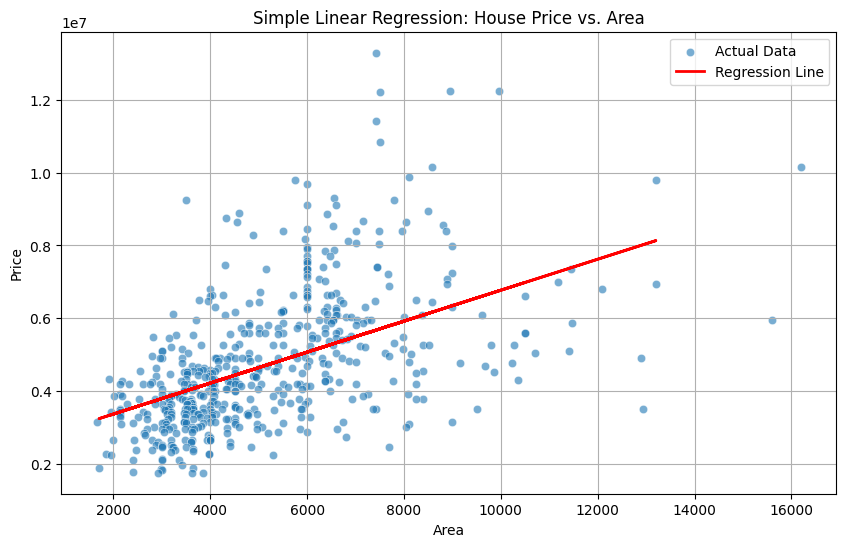

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['area'], y=df['price'], alpha=0.6, label='Actual Data')
plt.plot(X_simple_test, y_simple_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Simple Linear Regression: House Price vs. Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
X_multi = df.drop('price', axis=1)


In [17]:
X_multi_train, X_multi_test, y_train, y_test = train_test_split(X_multi, y, test_size=0.2, random_state=42)


In [18]:
multi_model = LinearRegression()
multi_model.fit(X_multi_train, y_train)


LinearRegression()

In [19]:
y_multi_pred = multi_model.predict(X_multi_test)


In [20]:
print(y_multi_pred)

[5136335.60690601 7224126.18278476 3117456.2216204  4648446.35018154
 3338156.78461232 3562578.40011064 5658892.1778917  6367204.51689223
 2703478.91700821 2659779.48654543 9557424.39803579 2801003.85472739
 3174224.37553664 3397434.31036347 3691547.93423797 5181641.655058
 3033932.46364427 4811122.06256094 4355485.70312207 3585449.75086963
 5789644.74428827 5913739.28418165 2732953.77521922 4717086.31564498
 5246202.0017044  7513530.81378557 3212162.9446792  5175270.28297771
 8182361.59014424 3416151.84047616 6462198.50512669 3321616.01274445
 6714978.98547552 4232221.37892387 3598093.17363527 5818063.91965751
 4804853.7666528  4401115.14942087 3213274.2170892  4608084.13998834
 4584665.92863741 3530259.19172269 7205024.40608071 4014079.67904053
 3764528.9074701  4283736.53890702 6744442.09159377 4072047.45454625
 3783790.26615077 3390104.20473735 7235580.61949238 2793036.62804652
 4366569.74481692 4533557.49115503 3709108.27699847 2709921.65039356
 7459736.18353658 2934654.00606908 4